In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Turn off NumPy division warnings
np.seterr(divide='ignore', invalid='ignore')

# Image width and height in pixels
img_width = 1936
img_height = 1216

bin_dir = '/home/nfahlgren/terraref/2016-06-19/2016-06-19__03-50-24-733/'
# Example image name: 4208f9d6-7f58-4dbf-9ede-217262a5c1f1_rawData0040.bin

In [3]:
def convert_raw_8bit(raw_img, height, width):
    # Read .bin file as string
    bin_file = open(raw_img, "rb+")
    img_str = bin_file.read()
    # Convert raw image from string to 8-bit NumPy array
    raw = np.fromstring(img_str, dtype=np.uint8, count=height*width)
    # Reshape from NumPy array to a NumPy matrix
    raw_img = raw.reshape(height, width)
    return raw_img

In [4]:
# Loop over all the .bin files in the input directory and store them by frame number
frames = {}
for (dirpath, dirnames, filenames) in os.walk(bin_dir):
    for filename in filenames:
        if filename[-3:] == 'bin':
            frames[int(filename[-8:-4])] = filename

In [5]:
# The F-dark image is the image taken before light pulse (frame 0)
fdark = convert_raw_8bit(bin_dir + frames[0], img_height, img_width)
# The F-min image is the first image taken after the light pulse (frame 1)
fmin = convert_raw_8bit(bin_dir + frames[1], img_height, img_width)

In [6]:
# Calculate the maximum fluorescence for each frame
fave = []
fave.append(np.max(fdark))
#fave.append(np.max(fmin))

# Calculate the maximum value for frames 2 through 100. Bin file 101 is an XML file that lists the frame times
for i in range(2, 101):
    img = convert_raw_8bit(bin_dir + frames[i], img_height, img_width)
    fave.append(np.max(img))

print(fave)

[43, 80, 82, 90, 93, 96, 94, 96, 96, 94, 95, 96, 101, 98, 97, 96, 95, 94, 101, 94, 97, 100, 97, 95, 96, 95, 95, 95, 93, 96, 97, 96, 99, 93, 94, 95, 94, 96, 95, 92, 95, 95, 96, 94, 95, 94, 40, 43, 46, 43, 45, 40, 40, 47, 49, 42, 39, 45, 44, 45, 41, 45, 43, 47, 47, 44, 47, 45, 44, 49, 40, 42, 42, 49, 46, 45, 42, 45, 44, 46, 43, 44, 42, 46, 42, 45, 47, 45, 46, 49, 40, 44, 44, 45, 42, 44, 49, 46, 49, 48]


In [7]:
# Assign the first image with the most fluorescence as F-max
fmax = convert_raw_8bit(bin_dir + frames[np.where(fave == np.max(fave))[0][0]], img_height, img_width)

In [8]:
# Calculate F-variable (F-max - F-min)
fv = np.subtract(fmax, fmin)

In [9]:
# Calculate Fv/Fm (F-variable / F-max)
fvfm = np.divide(fv, fmax)

In [10]:
# Fv/Fm will generate invalid values, such as division by zero
# Convert invalid values to zero. Valid values will be between 0 and 1
fvfm[np.where(np.isnan(fvfm))] = 0
fvfm[np.where(np.isinf(fvfm))] = 0
fvfm[np.where(fvfm > 1.0)] = 0

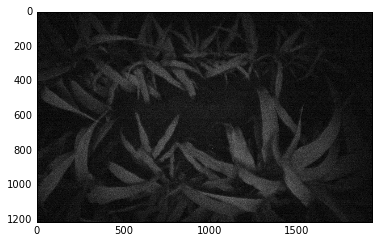

In [11]:
# Plot F-min
plt.imshow(fmin, cmap="gray")
plt.show()

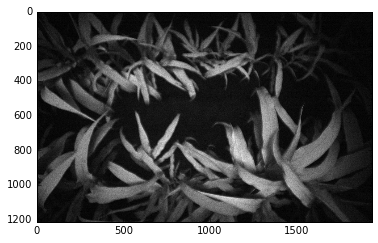

In [12]:
# Plot F-max
plt.imshow(fmax, cmap="gray")
plt.show()

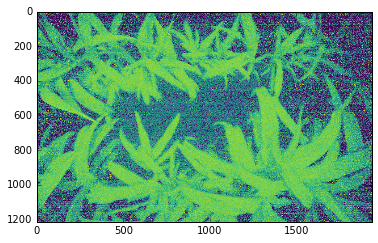

In [13]:
# Plot Fv/Fm (pseudocolored)
plt.imshow(fvfm, cmap="viridis")
plt.show()

In [23]:
# Calculate histogram of Fv/Fm values from the whole image
hist, bins = np.histogram(fvfm, bins=20)

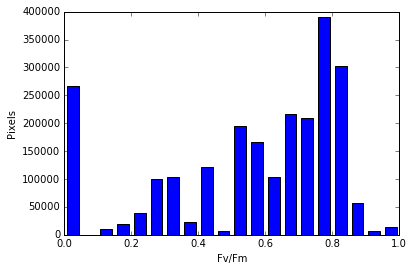

In [27]:
# Plot Fv/Fm histogram
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel("Fv/Fm")
plt.ylabel("Pixels")
plt.show()